In [4]:
from shared.preface import *
import shared.functions as fct

# Load data.
nus = 10000
MW_HALO = False
AG_HALO = False
VC_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
u_all = fct.load_u_sim(nus, halos)

### Calculating & Investigating final number density plot

In [ ]:
def number_density_1_mass(m_nu_eV, average=False):

    n_nus = np.zeros(len(m_nu_eV))
    for i, m_eV in enumerate(m_nu_eV):

        # Get momenta.
        p, _ = fct.u_to_p_eV(u_all, m_eV)

        if average and m_eV >= 0.1:
            # Calculate number density, values are averaged for z in [3.5, 4].
            idx = np.array(np.where(ZEDS >= 3.5)).flatten()

            temp = np.zeros(len(idx))
            for j,k in enumerate(idx):
                val = fct.number_density(p[:,0], p[:,k])
                temp[j] = val

            n_nus[i] = np.mean(temp)

        else:
            n_nus[i] = fct.number_density(p[:,0], p[:,-1])

    np.save(
        f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy', 
        n_nus
        )


# 10 to 300 meV like in the paper.
mass_range_eV = np.geomspace(0.01, 0.3, 100)*eV

number_density_1_mass(mass_range_eV, average=False)
n_nus = np.load(
    f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy'
    )/N0

# Plotting:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(mass_range_eV*1e3, (n_nus-1))
x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.scatter(x_ends, y_ends, s=12, marker='x', c='r')

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'Halos: {halos}, Neutrinos: {nus}')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
ax.set_ylim(1e-5, 1e-1)
plt.grid(True, which="both", ls="-")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/clustering_factors_nus_{nus}_halos_{halos}.pdf')
plt.show()

print('Max value:', np.max(n_nus), np.max(n_nus-1))

### Range of integration, ultimately determining number density.

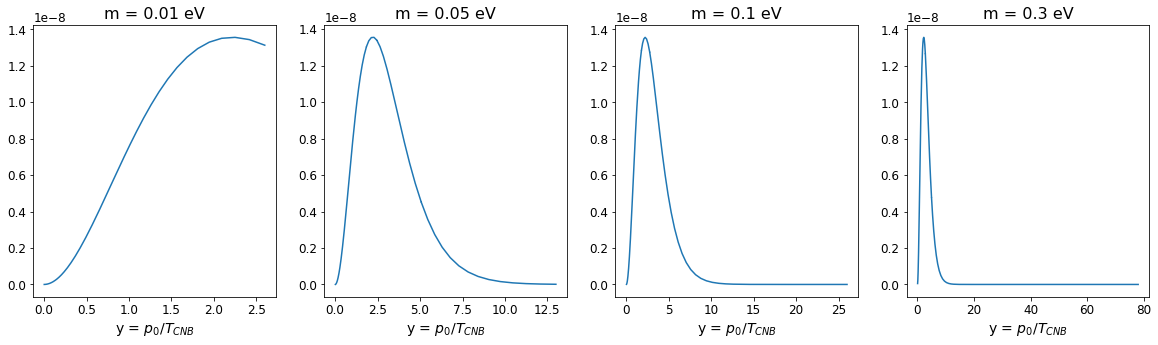

In [5]:
# Load data.
nus = 10000
MW_HALO = False
AG_HALO = False
VC_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
u_all = fct.load_u_sim(nus, halos)

fig, ax = plt.subplots(1,4, figsize=(20,5))

for i, m_eV in enumerate(NU_MASSES):

    # Convert to first and last momenta (of each neutrino).
    p0, _ = fct.u_to_p_eV(u_all[:,0], m_eV)
    p1, _ = fct.u_to_p_eV(u_all[:,-1], m_eV)

    # Sort momenta.
    ind = p0.argsort()
    p0_sort, p1_sort = p0[ind], p1[ind]

    # Fermi-Dirac value with momentum at end of sim.
    FDvals = fct.Fermi_Dirac(p1_sort)

    # What number density function integrates.
    y = p0_sort**2 * FDvals
    x = p0_sort

    ax[i].plot(x/T_CNB, y)
    ax[i].set_xlabel(r'y = $p_0/T_{CNB}$')
    ax[i].set_title(f'm = {m_eV} eV')

plt.show()